In [41]:
# working code to plot the nodes and connect to desired amount of neighbouring nodes
# added ignore list
# removed duplicated node locations

import pandas as pd
from geopy.distance import distance
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from heapq import nsmallest

# Set the number of closest node each node will be connected to:
num_connections = 9

# The nodes which will be ignored during graph making. Each nodes are represented as (Lat1, Long1)
ignore_list = [(36.068619, -115.211891),(35.759998,-115.760002),(35.650002,-115.650002), (41.2345, -112.6789), (42.3456, -113.7890)]

data = pd.read_csv('./detector/detectors2018.csv')

#data = data.dropna(subset=['latitude', 'longitude'])  # Drop rows with missing values in lat/long
latitude = data.iloc[:, 5].astype(str).apply(lambda x: float(x[:2] + '.' + x[2:]))
longitude = data.iloc[:, 6].astype(str).apply(lambda x: float(x[:4] + '.' + x[4:]))
ids = data.iloc[:, 1]

locations, index = np.unique(np.column_stack((latitude, longitude)), axis=0, return_index=True)
ids = ids[index]

# Check if each location is in the ignore list and remove it if it is
mask = [tuple(loc) not in ignore_list for loc in locations]
locations = locations[mask]
ids = ids[mask]

# Calculate the distance matrix between all remaining locations
dist_matrix = distance_matrix(locations, locations)

graph = {}

for i in range(len(locations)):
    graph[i] = []

# Connect each node to the closest num_connections nodes
for i in range(len(locations)):
    closest = nsmallest(num_connections+1, range(len(dist_matrix[i])), key=lambda x: dist_matrix[i][x])
    closest.remove(i)
    for j in closest:
        distance_km = distance(locations[i], locations[j]).kilometers
        graph[i].append((j, distance_km))



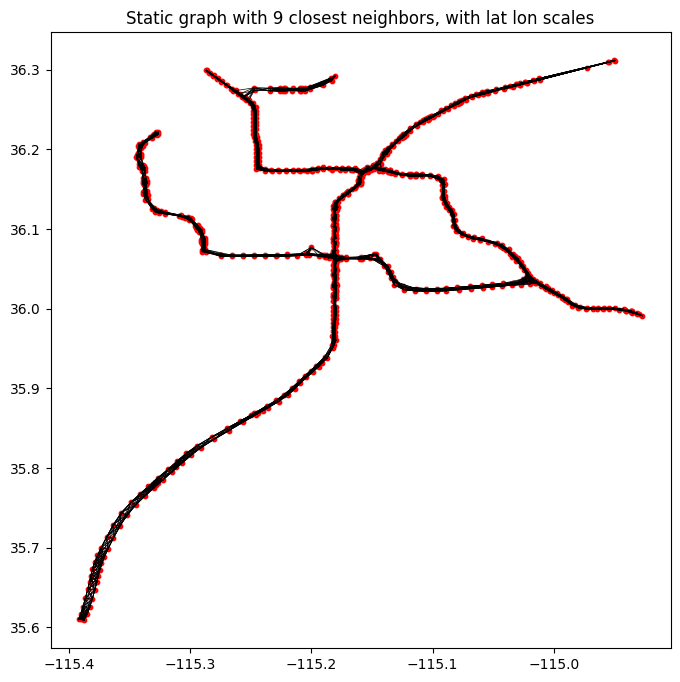

In [42]:
# Plot the graph with the set amount of edges
# X-Y scales are lat lon

plt.figure(figsize=(8, 8))
for i in range(len(locations)):
    for j, distance in graph[i]:
        plt.plot([locations[i][1], locations[j][1]], [locations[i][0], locations[j][0]], 'k-', linewidth=0.5)
plt.scatter(locations[:,1], locations[:,0], s=10, c='r')

plt.title(f"Static graph with {num_connections} closest neighbors, with lat lon scales")
plt.show()

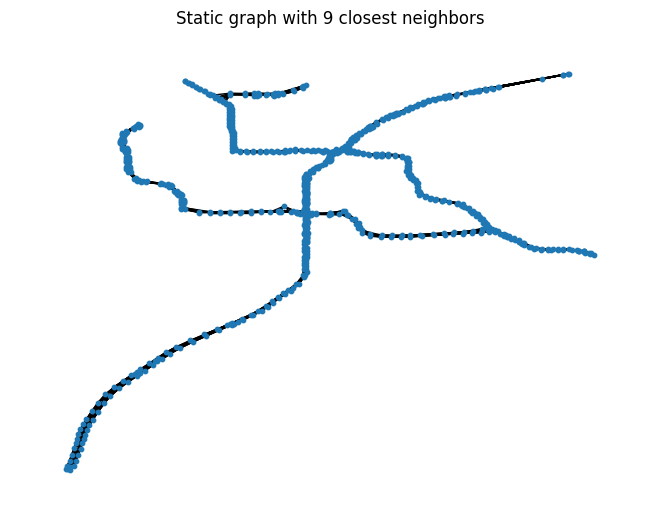

In [43]:
import networkx as nx
import matplotlib.pyplot as plt

# Plot the static grpah using NetworkX
# Create a dictionary to map node IDs to latitude and longitude
pos = {}
for i, (lat, lon) in enumerate(locations):
    pos[i] = (lon, lat)

# Create the NetworkX graph and add the edges
G = nx.Graph()
for i in range(len(locations)):
    for j, dist in graph[i]:
        G.add_edge(i, j, weight=dist)

# Draw the graph with node positions based on latitude and longitude
nx.draw(G, pos=pos, with_labels=False, node_size=10)

# Show the plot
plt.title(f"Static graph with {num_connections} closest neighbors")
plt.show()



In [45]:
import csv

# Save the adjacency list to a CSV file
with open('raw_weight_adjacency_list_I15.csv', mode='w') as file:
    writer = csv.writer(file)
    writer.writerow(['node', 'neighbor', 'distance'])
    for node in graph:
        for neighbor, distance in graph[node]:
            writer.writerow([node, neighbor, f"{distance:.2f} km"])
print("The adjacency list has been saved to raw_weight_adjacency_list_I15.csv")

The adjacency list has been saved to raw_weight_adjacency_list_I15.csv


In [29]:
import networkx as nx

# Load the graph from the adjacency list
G = nx.read_weighted_edgelist('raw_weight_adjacency_list_I15.csv', delimiter=',')

# Calculate and print some general properties of the graph
print(f'Number of nodes: {nx.number_of_nodes(G)}')
print(f'Number of edges: {nx.number_of_edges(G)}')
print(f'Diameter: {nx.diameter(G)}')
print(f'Average shortest path length: {nx.average_shortest_path_length(G)}')
print(f'Average degree: {sum(dict(G.degree()).values()) / nx.number_of_nodes(G)}')

# Calculate and print some centrality measures of the graph
print(f'Degree centrality: {nx.degree_centrality(G)}')
print(f'Closeness centrality: {nx.closeness_centrality(G)}')
print(f'Betweenness centrality: {nx.betweenness_centrality(G)}')
print(f'Eigenvector centrality: {nx.eigenvector_centrality(G)}')


TypeError: Failed to convert weight data distance to type <class 'float'>.